In [1]:
import pandas as pd
import numpy as np
import openpyxl
import seaborn as sb
import seaborn as sns
import matplotlib.pyplot as plt
import pickle
import warnings
warnings.filterwarnings("ignore")

#for preprocessing
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import MinMaxScaler, StandardScaler, LabelEncoder
import joblib

# for resampling
from imblearn.over_sampling import RandomOverSampler

#For model
from tensorflow import keras
import tensorflow as tf

# for checking testing results
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score, classification_report, confusion_matrix

# Import Data

In [2]:
import pandas as pd
from google.colab import drive

drive.mount('/content/drive')
path = "/content/drive/MyDrive/Colab Notebooks/finalfix_dataset.csv"

data = pd.read_csv(path)
data

Mounted at /content/drive


,gender,age,ever_married,work_type,Residence_type,bmi,smoking_status,physical_activity,outcome
0,1,58.0,1,1,1,3,1,2,0
1,2,70.0,1,1,2,3,3,2,0
2,2,47.0,1,1,1,3,2,2,0
3,2,32.0,1,1,2,3,4,2,0
4,2,74.0,1,2,1,3,1,2,0
...,...,...,...,...,...,...,...,...,...
727,2,19.0,2,5,3,3,5,0,2
728,1,76.0,2,5,3,3,5,0,2
729,2,70.0,2,5,3,3,5,0,2
730,1,59.0,2,5,3,3,5,0,2


# EDA

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 732 entries, 0 to 731
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             732 non-null    int64  
 1   age                732 non-null    float64
 2   ever_married       732 non-null    int64  
 3   work_type          732 non-null    int64  
 4   Residence_type     732 non-null    int64  
 5   bmi                732 non-null    int64  
 6   smoking_status     732 non-null    int64  
 7   physical_activity  732 non-null    int64  
 8   outcome            732 non-null    int64  
dtypes: float64(1), int64(8)
memory usage: 51.6 KB


In [4]:
data.describe()

,gender,age,ever_married,work_type,Residence_type,bmi,smoking_status,physical_activity,outcome
count,732.000000,732.000000,732.000000,732.000000,732.000000,732.000000,732.000000,732.000000,732.000000
mean,1.594262,51.187158,1.463115,3.420765,2.310109,1.881148,3.711749,1.161202,0.726776
std,0.491370,19.917867,0.644883,1.843540,0.829191,0.992902,1.609725,0.849058,0.863736
min,1.000000,2.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000
25%,1.000000,34.000000,1.000000,1.000000,2.000000,1.000000,2.000000,0.000000,0.000000
50%,2.000000,53.000000,2.000000,5.000000,3.000000,1.000000,5.000000,1.000000,0.000000
75%,2.000000,67.000000,2.000000,5.000000,3.000000,3.000000,5.000000,2.000000,2.000000
max,2.000000,93.000000,2.000000,5.000000,3.000000,3.000000,5.000000,2.000000,2.000000


In [6]:
# Inisialisasi LabelEncoder
label_encoder = LabelEncoder()

# Daftar variabel yang akan di-label encoding
categorical_columns = ['gender', 'ever_married', 'work_type', 'Residence_type', 'bmi', 'outcome', 'smoking_status']

# Melakukan label encoding untuk setiap variabel kategori
for column in categorical_columns:
    data[column] = label_encoder.fit_transform(data[column])
data

,gender,age,ever_married,work_type,Residence_type,bmi,smoking_status,physical_activity,outcome
0,0,58.0,1,0,0,2,0,2,0
1,1,70.0,1,0,1,2,2,2,0
2,1,47.0,1,0,0,2,1,2,0
3,1,32.0,1,0,1,2,3,2,0
4,1,74.0,1,1,0,2,0,2,0
...,...,...,...,...,...,...,...,...,...
727,1,19.0,2,4,2,2,4,0,2
728,0,76.0,2,4,2,2,4,0,2
729,1,70.0,2,4,2,2,4,0,2
730,0,59.0,2,4,2,2,4,0,2


In [7]:
# Mengambil variabel yang akan dinormalisasi
columns_to_normalize = ['age']

# Melakukan normalisasi
scaler = MinMaxScaler()
data[columns_to_normalize] = scaler.fit_transform(data[columns_to_normalize])
data

,gender,age,ever_married,work_type,Residence_type,bmi,smoking_status,physical_activity,outcome
0,0,0.615385,1,0,0,2,0,2,0
1,1,0.747253,1,0,1,2,2,2,0
2,1,0.494505,1,0,0,2,1,2,0
3,1,0.329670,1,0,1,2,3,2,0
4,1,0.791209,1,1,0,2,0,2,0
...,...,...,...,...,...,...,...,...,...
727,1,0.186813,2,4,2,2,4,0,2
728,0,0.813187,2,4,2,2,4,0,2
729,1,0.747253,2,4,2,2,4,0,2
730,0,0.626374,2,4,2,2,4,0,2


# Make Model

In [8]:
#feature selection data and split data
X = data.drop(columns='outcome')
y = data.outcome

In [9]:
X

,gender,age,ever_married,work_type,Residence_type,bmi,smoking_status,physical_activity
0,0,0.615385,1,0,0,2,0,2
1,1,0.747253,1,0,1,2,2,2
2,1,0.494505,1,0,0,2,1,2
3,1,0.329670,1,0,1,2,3,2
4,1,0.791209,1,1,0,2,0,2
...,...,...,...,...,...,...,...,...
727,1,0.186813,2,4,2,2,4,0
728,0,0.813187,2,4,2,2,4,0
729,1,0.747253,2,4,2,2,4,0
730,0,0.626374,2,4,2,2,4,0


In [10]:
y

0      0
1      0
2      0
3      0
4      0
      ..
727    2
728    2
729    2
730    2
731    2
Name: outcome, Length: 732, dtype: int64

In [11]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

In [12]:
#resampling
oversample = RandomOverSampler(sampling_strategy='auto')

X_ros, y_ros = oversample.fit_resample(X, y)

In [13]:
#data traing 90% dan data testing 10% before random oversampling
X_train, X_test, y_train, y_test = train_test_split(X_ros, y_ros, test_size=0.2, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((960, 8), (240, 8), (960,), (240,))

In [14]:
# model kedua 0.84

model = Sequential()
model.add(Dense(16, activation='relu', input_shape=(8,)))
model.add(Dense(12, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(3, activation='softmax'))

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


In [15]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 16)                144       
                                                                 
 dense_1 (Dense)             (None, 12)                204       
                                                                 
 dense_2 (Dense)             (None, 8)                 104       
                                                                 
 dense_3 (Dense)             (None, 3)                 27        
                                                                 
Total params: 479 (1.87 KB)
Trainable params: 479 (1.87 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [16]:
scce = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False)
optimizer = tf.keras.optimizers.AdamW(learning_rate=1e-3)

model.compile(
    loss=scce,
    optimizer=optimizer,
    metrics=['accuracy']
)

In [17]:
history = model.fit(X_train, y_train, epochs=100, batch_size=128, validation_data=(X_test, y_test))

Epoch 1/100
8/8 [==============================] - 2s 62ms/step - loss: 1.1984 - accuracy: 0.3396 - val_loss: 1.1497 - val_accuracy: 0.3292
Epoch 2/100
8/8 [==============================] - 0s 11ms/step - loss: 1.1090 - accuracy: 0.3500 - val_loss: 1.0737 - val_accuracy: 0.3542
Epoch 3/100
8/8 [==============================] - 0s 14ms/step - loss: 1.0520 - accuracy: 0.3854 - val_loss: 1.0279 - val_accuracy: 0.4167
Epoch 4/100
8/8 [==============================] - 0s 12ms/step - loss: 1.0145 - accuracy: 0.4365 - val_loss: 0.9922 - val_accuracy: 0.4792
Epoch 5/100
8/8 [==============================] - 0s 10ms/step - loss: 0.9830 - accuracy: 0.4688 - val_loss: 0.9597 - val_accuracy: 0.5208
Epoch 6/100
8/8 [==============================] - 0s 10ms/step - loss: 0.9557 - accuracy: 0.4781 - val_loss: 0.9313 - val_accuracy: 0.5292
Epoch 7/100
8/8 [==============================] - 0s 7ms/step - loss: 0.9303 - accuracy: 0.4865 - val_loss: 0.9037 - val_accuracy: 0.5250
Epoch 8/100
8/8 [====

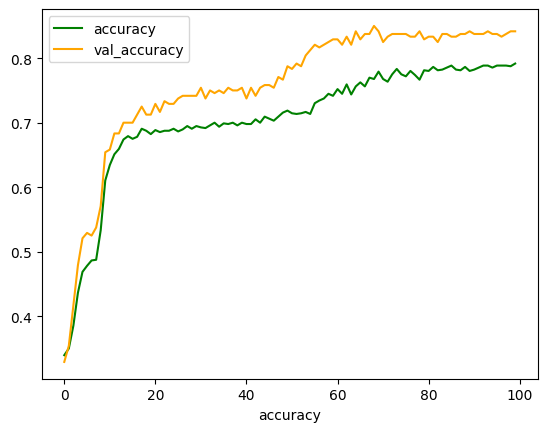

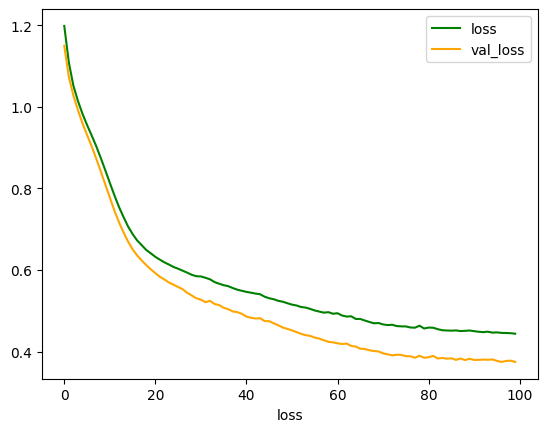

In [18]:
def plot_graphs(history, string):
    plt.plot(history.history[string], color = 'green')
    plt.plot(history.history['val_'+string], color = 'orange')
    plt.xlabel('epoch')
    plt.xlabel(string)
    plt.legend([string, "val_"+string])
    plt.show()

plot_graphs(history, 'accuracy')
plot_graphs(history, 'loss')

In [19]:
evaluation = model.evaluate(X_test, y_test)

8/8 [==============================] - 0s 3ms/step - loss: 0.3748 - accuracy: 0.8417


In [20]:
ann_pred = np.argmax(model.predict(X_test),axis=1)
ann_pred

8/8 [==============================] - 0s 2ms/step


array([2, 1, 0, 0, 0, 2, 1, 1, 2, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 2,
       2, 0, 0, 1, 2, 0, 2, 2, 0, 1, 2, 2, 0, 2, 0, 1, 1, 2, 0, 0, 2, 0,
       1, 0, 0, 1, 0, 0, 1, 2, 0, 0, 0, 0, 0, 2, 2, 0, 1, 0, 1, 0, 0, 1,
       0, 0, 2, 2, 0, 0, 2, 0, 1, 2, 1, 0, 1, 1, 2, 1, 1, 0, 0, 2, 2, 0,
       2, 0, 2, 0, 1, 0, 2, 2, 2, 1, 1, 0, 0, 0, 1, 0, 1, 1, 2, 1, 2, 1,
       2, 1, 0, 1, 2, 2, 1, 0, 1, 0, 2, 1, 2, 2, 2, 2, 1, 0, 2, 2, 1, 2,
       1, 1, 2, 2, 2, 0, 0, 1, 2, 2, 0, 0, 1, 2, 2, 0, 2, 0, 2, 1, 2, 1,
       1, 0, 1, 1, 0, 1, 2, 1, 2, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0,
       1, 2, 1, 0, 2, 1, 1, 2, 1, 1, 0, 0, 0, 0, 1, 2, 1, 0, 2, 0, 1, 1,
       1, 1, 1, 1, 2, 1, 1, 1, 1, 2, 2, 0, 2, 1, 2, 1, 1, 1, 2, 1, 2, 2,
       2, 1, 2, 1, 1, 2, 1, 1, 1, 2, 2, 0, 2, 2, 1, 0, 0, 2, 2, 1])

In [21]:
print ('accuracy_score: ',accuracy_score(ann_pred, y_test))
print ('f1_score: ',f1_score(ann_pred, y_test, pos_label='positive', average='micro'))
print ('recall_score: ',recall_score(ann_pred, y_test, pos_label='positive', average='micro'))
print ('precision_score: ',precision_score(ann_pred, y_test, pos_label='positive', average='micro'))

accuracy_score:  0.8416666666666667
f1_score:  0.8416666666666667
recall_score:  0.8416666666666667
precision_score:  0.8416666666666667


In [22]:
print(classification_report(y_test, ann_pred))

              precision    recall  f1-score   support

           0       0.77      0.73      0.75        77
           1       0.89      0.93      0.91        88
           2       0.85      0.85      0.85        75

    accuracy                           0.84       240
   macro avg       0.84      0.84      0.84       240
weighted avg       0.84      0.84      0.84       240



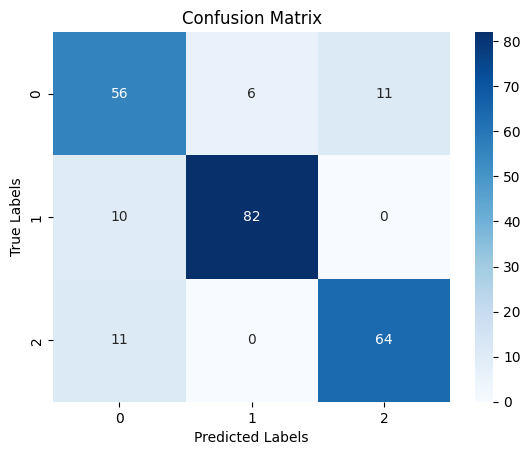

In [23]:
# Create the confusion matrix
confusion = confusion_matrix(ann_pred, y_test)

# Create a heatmap of the confusion matrix
sns.heatmap(confusion, annot=True, cmap="Blues", fmt="d")

# Set the axis labels
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")

# Set the title
plt.title("Confusion Matrix")

# Display the plot
plt.show()

# Save Model

In [24]:
# Save your model
model.save('saved_model_ann')

In [25]:
# Save your model
model.save('model_ann.h5')